In [63]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [64]:
data = "Capitalism is an economic system in which the means of production, distribution, and exchange are privately owned and operated for profit. \
It is driven by market forces such as supply and demand, where individuals and businesses make decisions based on their own interests. \
Under capitalism, competition plays a central role, encouraging innovation, efficiency, and economic growth. People are free to produce goods, offer services, and trade in open markets, \
which often leads to wealth creation and higher living standards. However, capitalism also has its drawbacks. The unequal distribution of wealth can result in significant social and economic disparities, \
where a small portion of the population controls most resources while others struggle to meet basic needs. Critics argue that unchecked capitalism can lead to exploitation of labor, \
environmental degradation, and monopolies that stifle competition. Supporters, on the other hand, believe it provides the greatest freedom for individuals to pursue their goals and rewards hard work and \
creativity. In essence, capitalism remains a dynamic and evolving system that has shaped much of the modern world, balancing between prosperity and inequality, innovation and instability, \
depending on how it is regulated and practiced."

In [65]:
# Normalization
data_lower = data.lower()
data_no_punc = re.sub(r'[^\w\s]','', data_lower)
stop_words = set(stopwords.words('english'))
no_stopwords_string = ''
data_list = data_no_punc.split()
for word in data_list:
  if((word in stop_words) == False):
    no_stopwords_string += word
  no_stopwords_string += ' '

# Normalized Text
print(f"Normalized Text: {no_stopwords_string}")

# Word Tokenized Text
normalized_list = no_stopwords_string.split()
print(f"Word Tokenized Text: {normalized_list}")

Normalized Text: capitalism   economic system    means  production distribution  exchange  privately owned  operated  profit   driven  market forces   supply  demand  individuals  businesses make decisions based    interests  capitalism competition plays  central role encouraging innovation efficiency  economic growth people  free  produce goods offer services  trade  open markets  often leads  wealth creation  higher living standards however capitalism also   drawbacks  unequal distribution  wealth  result  significant social  economic disparities   small portion   population controls  resources  others struggle  meet basic needs critics argue  unchecked capitalism  lead  exploitation  labor environmental degradation  monopolies  stifle competition supporters    hand believe  provides  greatest freedom  individuals  pursue  goals  rewards hard work  creativity  essence capitalism remains  dynamic  evolving system   shaped much   modern world balancing  prosperity  inequality innovatio

In [66]:
# Word Tokenization
data_tokenized = word_tokenize(no_stopwords_string)
print(f"Tokenized data: {data_tokenized}")

Tokenized data: ['capitalism', 'economic', 'system', 'means', 'production', 'distribution', 'exchange', 'privately', 'owned', 'operated', 'profit', 'driven', 'market', 'forces', 'supply', 'demand', 'individuals', 'businesses', 'make', 'decisions', 'based', 'interests', 'capitalism', 'competition', 'plays', 'central', 'role', 'encouraging', 'innovation', 'efficiency', 'economic', 'growth', 'people', 'free', 'produce', 'goods', 'offer', 'services', 'trade', 'open', 'markets', 'often', 'leads', 'wealth', 'creation', 'higher', 'living', 'standards', 'however', 'capitalism', 'also', 'drawbacks', 'unequal', 'distribution', 'wealth', 'result', 'significant', 'social', 'economic', 'disparities', 'small', 'portion', 'population', 'controls', 'resources', 'others', 'struggle', 'meet', 'basic', 'needs', 'critics', 'argue', 'unchecked', 'capitalism', 'lead', 'exploitation', 'labor', 'environmental', 'degradation', 'monopolies', 'stifle', 'competition', 'supporters', 'hand', 'believe', 'provides', 

In [67]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
data_lemmatized = []
# DT->Determiner, JJ->Adjective, NN->Noun, VBZ->Verb, IN->Preposition, RB->Adverb, VBN->Past Participle Verb,
# NNS->Noun Plural, VBP->Verb Non-3rd Person Singular Present, VBG->Verb Gerund or Present Participle
# JJR->Comparitive Adjective, JJS->Superlative Adjective, VBD->Verb Past Tense
data_pos_tokens = pos_tag(data_tokenized)
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'
data_lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in data_pos_tokens]
print(f"Lemmatized data: {data_lemmatized}")

Lemmatized data: ['capitalism', 'economic', 'system', 'mean', 'production', 'distribution', 'exchange', 'privately', 'own', 'operated', 'profit', 'driven', 'market', 'force', 'supply', 'demand', 'individual', 'business', 'make', 'decision', 'base', 'interest', 'capitalism', 'competition', 'play', 'central', 'role', 'encourage', 'innovation', 'efficiency', 'economic', 'growth', 'people', 'free', 'produce', 'good', 'offer', 'service', 'trade', 'open', 'market', 'often', 'lead', 'wealth', 'creation', 'high', 'living', 'standard', 'however', 'capitalism', 'also', 'drawbacks', 'unequal', 'distribution', 'wealth', 'result', 'significant', 'social', 'economic', 'disparity', 'small', 'portion', 'population', 'control', 'resource', 'others', 'struggle', 'meet', 'basic', 'need', 'critic', 'argue', 'unchecked', 'capitalism', 'lead', 'exploitation', 'labor', 'environmental', 'degradation', 'monopoly', 'stifle', 'competition', 'supporter', 'hand', 'believe', 'provide', 'great', 'freedom', 'individu

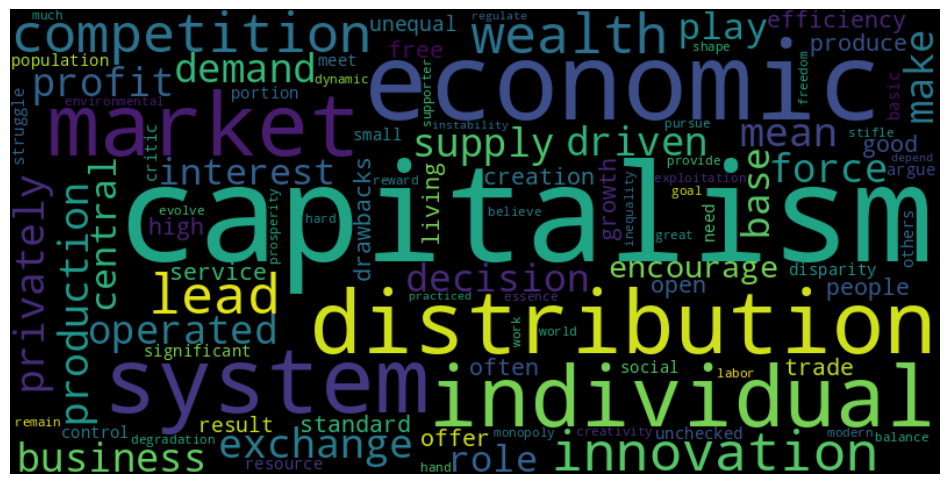

In [68]:
# Wordcloud
wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='black',
        stopwords=STOPWORDS,
        min_font_size=10
    ).generate(" ".join(data_lemmatized))

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()